# Simon Benninga's Financial Modeling, 4th edition
## Part II: Portfolio Models
### Chapter 9: Calculating Efficient Portfolios
#### 9.4: Calculating the efficient frontier

In [1]:
import numpy as np
import pandas as pd


Bad key "echo backend" on line 1 in
/Users/danieltoma/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
var_cov_matrix = np.array([[0.10, 0.01, 0.03, 0.05],
                          [0.01, 0.30, 0.06, -0.04],
                          [0.03, 0.06, 0.40, 0.02],
                          [0.05, -0.04, 0.02, 0.50]])
constant_c = 0.04
mean_returns = np.array([[0.06],
                        [0.08],
                        [0.10],
                        [0.15]])
mean_returns_minus_constant = (mean_returns - constant_c)
mean_returns_minus_constant

array([[ 0.02],
       [ 0.04],
       [ 0.06],
       [ 0.11]])

In [3]:
#Computing an envelope portfolio with constant = 0%
z_0 = np.dot(np.linalg.inv(var_cov_matrix), mean_returns)
z_0

array([[ 0.38610628],
       [ 0.25673205],
       [ 0.16877337],
       [ 0.275177  ]])

In [4]:
envelope_portfolio_x = np.divide(z_0, np.sum(z_0))
envelope_portfolio_x

array([[ 0.35527263],
       [ 0.23622996],
       [ 0.15529548],
       [ 0.25320193]])

In [5]:
#Computing an envelope portfolio with constant = 4%
z_4 = np.dot(np.linalg.inv(var_cov_matrix), mean_returns_minus_constant)
z_4

array([[ 0.04039606],
       [ 0.13863621],
       [ 0.1150524 ],
       [ 0.22244919]])

In [6]:
envelope_portfolio_y = np.divide(z_4, np.sum(z_4))
envelope_portfolio_y

array([[ 0.07820602],
       [ 0.26839713],
       [ 0.22273932],
       [ 0.43065752]])

In [7]:
#E(x)
E_x = np.dot(envelope_portfolio_x.T, mean_returns)
E_x

array([[ 0.09372459]])

In [8]:
#Var(x)
var_x = np.dot(np.dot(envelope_portfolio_x.T, var_cov_matrix), envelope_portfolio_x)
var_x

array([[ 0.08623994]])

In [9]:
#Sigma(x)
sigma_x = np.sqrt(var_x)
sigma_x

array([[ 0.29366637]])

In [10]:
#E(y)
E_y = np.dot(envelope_portfolio_y.T, mean_returns)
E_y

array([[ 0.11303669]])

In [11]:
#Var(y)
var_y = np.dot(np.dot(envelope_portfolio_y.T, var_cov_matrix), envelope_portfolio_y)
var_y

array([[ 0.14139768]])

In [12]:
#Var(y)
var_y = np.dot(np.dot(envelope_portfolio_y.T, var_cov_matrix), envelope_portfolio_y)
var_y

array([[ 0.14139768]])

In [13]:
#Sigma(y)
sigma_y = np.sqrt(var_y)
sigma_y

array([[ 0.37602883]])

In [14]:
#Cov(x,y)
cov_xy = np.dot(np.dot(envelope_portfolio_x.T, var_cov_matrix), envelope_portfolio_y)
cov_xy[0]

array([ 0.10400982])

In [15]:
#Corr(x,y)
np.divide(cov_xy, sigma_x * sigma_y)

array([[ 0.94188733]])

In [16]:
#Proportion of x
p_x = 0.3

In [17]:
#Mean portfolio
E_p = p_x * E_x + (1 - p_x) * E_y
E_p

array([[ 0.10724306]])

In [18]:
#Variance portfolio
var_p = p_x ** 2 * var_x + (1 - p_x) ** 2 * var_y + 2 * p_x * (1 - p_x) * cov_xy
var_p

array([[ 0.12073058]])

In [19]:
#Portfolio standard deviation
sigma_p = np.sqrt(var_p)
sigma_p

array([[ 0.34746307]])

In [20]:
df_p = pd.DataFrame(columns=['Proportion of x', 'Sigma', 'Return'])

In [21]:
df_p

,Proportion of x,Sigma,Return


In [22]:
df_p = df_p.iloc[0:0]
proportions = [-1.5,-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.25,0.5,0.75,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0]
for i in proportions:
    df_p = df_p.append({'Proportion of x': i}, ignore_index=True)
    p = df_p['Proportion of x']
    df_p['Return'] = p * E_x[0] + (1 - p) * E_y[0]
    df_p['Sigma'] = (p ** 2 * var_x[0] + (1 - p) ** 2 * var_y[0] + 2 * p * (1 - p) * cov_xy[0]).apply(np.sqrt)
df_p

,Proportion of x,Sigma,Return
0,-1.50,0.545621,0.142005
1,-1.20,0.509292,0.136211
2,-1.00,0.485584,0.132349
3,-0.80,0.462357,0.128486
4,-0.60,0.439688,0.124624
5,-0.40,0.417668,0.120762
6,-0.20,0.396406,0.116899
7,0.00,0.376029,0.113037
8,0.25,0.352037,0.108209
9,0.50,0.330022,0.103381


In [23]:
import matplotlib.pyplot as plt

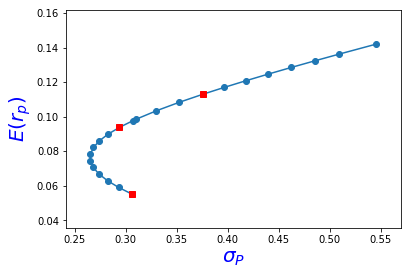

In [24]:
plt.scatter(df_p['Sigma'], df_p['Return'])
plt.plot(df_p['Sigma'], df_p['Return'])
plt.plot([0.376029], [0.113037], marker='s', color='r')
plt.plot([0.305994], [0.055100], marker='s', color='r')
plt.plot([0.293666], [0.093725], marker='s', color='r')
plt.xlabel("$\sigma_P$", color='b', size=20)
plt.ylabel("$E(r_p)$", color='b', size=20)
plt.show()

#### 9.5: Finding Efficient Portfolios in One Step

In [25]:
envelope_portfolio = np.dot(np.linalg.inv(var_cov_matrix), (mean_returns - constant_c)
                           ) / np.sum(np.dot(np.linalg.inv(var_cov_matrix), (mean_returns - constant_c)))
envelope_portfolio

array([[ 0.07820602],
       [ 0.26839713],
       [ 0.22273932],
       [ 0.43065752]])

$$x = \frac{S^{-1}\{E(r)-c\}}{Sum[S^{-1}\{E(r)-c\}]}$$

In [26]:
#Portfolio mean
sum([x*y for x,y in zip(envelope_portfolio, mean_returns)])[0]

0.1130366923032104

#### 9.7: Finding the Market Portfolio: The Capital Market Line (CML)

In [27]:
var_cov_matrix = np.array([[0.40, 0.03, 0.02, 0.00],
                          [0.03, 0.20, 0.001, -0.06],
                          [0.02, 0.001, 0.30, 0.03],
                          [0.00, -0.06, 0.03, 0.10]])

In [28]:
constant_c = 0.05

In [29]:
mean_returns = np.array([[0.06],
                        [0.05],
                        [0.07],
                        [0.08]])

In [30]:
z = np.dot(np.linalg.inv(var_cov_matrix), (mean_returns - constant_c))
z

array([[ 0.01574636],
       [ 0.10340388],
       [ 0.02996701],
       [ 0.35305222]])

In [31]:
envelope_portfolio_x = z / np.sum(z)
envelope_portfolio_x

array([[ 0.03135666],
       [ 0.20591431],
       [ 0.05967509],
       [ 0.70305394]])

In [32]:
#Portfolio expected return
sum([x*y for x,y in zip(envelope_portfolio_x, mean_returns)])[0]

0.072598686635280102

In [33]:
#Portfolio standard deviation
np.sqrt(np.dot(np.dot(envelope_portfolio_x.T, var_cov_matrix),envelope_portfolio_x))[0][0]

0.21213701193842574

#### 9.8: Testing the SML

In [34]:
assets = pd.read_csv('pages_241_assets.csv', usecols=[1,2,3,4])
assets

,Asset 1,Asset 2,Asset 3,Asset 4
0,-0.066256,-0.024905,-0.042695,0.117200
1,0.085300,0.024400,-0.031544,-0.083300
2,0.017937,0.044607,0.019195,0.191804
3,0.072484,0.178964,-0.065257,-0.074061
4,0.007545,-0.082230,-0.017571,-0.014436
5,-0.015696,0.008319,0.128800,-0.059221
6,-0.020985,0.051431,0.134068,-0.004569


In [35]:
mean_assets = np.array(assets.mean())
mean_assets

array([ 0.01147571,  0.0286553 ,  0.01785648,  0.01048809])

In [36]:
#Variance-covariance matrix
var_cov_matrix = (np.dot((assets - mean_assets).T, (assets - mean_assets))) / 7
var_cov_matrix

array([[ 0.00243764,  0.00191021, -0.0015214 , -0.00238922],
       [ 0.00191021,  0.00556599, -0.00067128, -0.00161348],
       [-0.0015214 , -0.00067128,  0.00572645, -0.00045129],
       [-0.00238922, -0.00161348, -0.00045129,  0.00941642]])

In [37]:
constant = 0.005

In [38]:
#Finding an efficient portfolio w
w = np.divide(np.dot(np.linalg.inv(var_cov_matrix), (mean_assets.T - constant)),
              np.sum(np.dot(np.linalg.inv(var_cov_matrix), (mean_assets.T - constant))))
w

array([ 0.31285941,  0.24641149,  0.2689937 ,  0.1717354 ])

In [39]:
import statsmodels.api as sm

/Users/danieltoma/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:
#Efficient portfolio w
efficient_portfolio_w = np.dot(assets, w)
efficient_portfolio_w

array([-0.01822283,  0.00990875,  0.05470626,  0.03650351, -0.02510749,
        0.02161523,  0.04138671])

In [41]:
#Implementing propositions 3-5—finding the SML
#Step 1:  Regress each asset's returns on those of the efficient portfolio w
#Slope of the 4 assets
beta = []
alpha = []
X = efficient_portfolio_w
for column in assets:
    Y = assets[column].values
    alpha.append(((Y.mean() * (X ** 2).mean()) - X.mean() * (X * Y).mean()) / ((X ** 2).mean() - (X.mean()) ** 2))
    beta.append(((X * Y).mean() - X.mean() * Y.mean()) / ((X ** 2).mean() - (X.mean()) ** 2))

In [42]:
beta

[0.52838188383644935,
 1.9301411170832004,
 1.0490174707876607,
 0.44779772929307649]

In [43]:
alpha

[0.0023580905808177487,
 -0.0046507055854160097,
 -0.00024508735393830353,
 0.0027610113535346181]

In [44]:
#Step 2: Regress the asset mean returns on their betas
m = mean_assets
b = np.array(beta)
from scipy.stats import linregress
linregress(b, m)

LinregressResult(slope=0.012255736235658746, intercept=0.005000000000000001, rvalue=1.0, pvalue=9.9999999999999979e-21, stderr=0.0)

In [45]:
#manually intercept
intercept = (m.mean() * (b ** 2).mean() - b.mean() * (b * m).mean()) / ((b ** 2).mean() - b.mean() ** 2)
intercept

0.0050000000000000062

In [46]:
#manually slope
slope = ((b * m).mean() - b.mean() * m.mean()) / ((b ** 2).mean() - b.mean() ** 2)
slope

0.012255736235658746

In [47]:
#R-squared
linregress(b, m).rvalue ** 2

1.0